<a href="https://colab.research.google.com/github/cistrans/Complete-Python-3-Bootcamp/blob/master/IRIS_data_request_Sisay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
pip install obspy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.5/14.5 MB 37.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 59.2 MB/s eta 0:00:00
  Attempting uninstall: sqlalchemy
    Found existing installation: SQLAlchemy 2.0.30
    Uninstalling SQLAlchemy-2.0.30:
      Successfully uninstalled SQLAlchemy-2.0.30
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython-sql 0.5.0 requires sqlalchemy>=2.0, but you have sqlalchemy 1.4.52 which is incompatible.


In [ ]:
import

Seismic data downloaded successfully and saved in MiniSEED format.


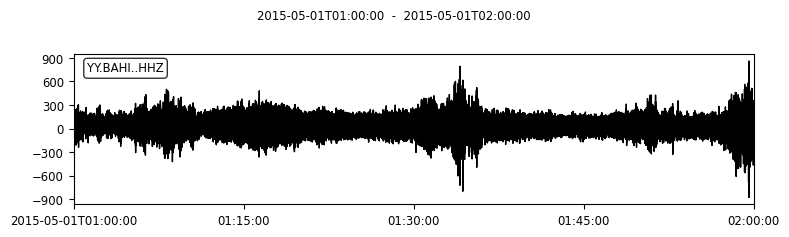

Error downloading seismic data: name 'plt' is not defined


In [3]:
from obspy import UTCDateTime, read_inventory, read
from obspy.clients.fdsn import Client

# Define the IRIS FDSN web service client
iris_client = Client("IRIS")

# Define parameters for the data request
start_time = UTCDateTime("2015-05-01T01:00:00")
end_time = UTCDateTime("2015-05-01T02:00:00")
network = "YY"  # Specify the network code
stations = ["BAHI","GINR", "GOND", "CHGE"] # Specify the station code
location = ""  # Specify the location code (empty string for default)
channel = "HHZ"  # Specify the channel code
miniseed_file = "seismic_data.mseed"  # File to save the downloaded MiniSEED data


# Request and download seismic data from IRIS
try:
    st = iris_client.get_waveforms(network, station, location, channel, start_time, end_time)
    st.write(miniseed_file, format="MSEED")
    print("Seismic data downloaded successfully and saved in MiniSEED format.")

    # Plot the downloaded seismic data
    st.plot()
    plt.title('Seismic Data')
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.show()

    # Show the location of the saved MiniSEED file
    print("Location of the saved MiniSEED file:", os.path.abspath(miniseed_file))
except Exception as e:
    print(f"Error downloading seismic data: {e}")

In [4]:
import os
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

# Define the IRIS FDSN web service client
iris_client = Client("IRIS")

# Define parameters for the data request
start_time = UTCDateTime("2015-05-01T01:00:00")
end_time = UTCDateTime("2015-05-01T02:00:00")
network = "YY"  # Specify the network code
stations = ["BAHI","GINR", "GOND", "CHGE"] # Specify the station code
location = ""  # Specify the location code (empty string for default)
channel = "HHZ"  # Specify the channel code
miniseed_file = "seismic2_data.mseed"
output_dir = "output_plots"  # Directory to save the output plots

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Request and plot seismic data from IRIS for each station
for station in stations:
    try:
        st = iris_client.get_waveforms(network, station, location, channel, start_time, end_time)
        plot_file = f"{station}_seismic_data.png"
        st.plot(outfile=os.path.join(output_dir, plot_file), title=f"Seismic Data - {station}")
        print(f"Seismic data for station {station} plotted and saved as {plot_file}.")
    except Exception as e:
        print(f"Error downloading or plotting seismic data for station {station}: {e}")

# Show the location of the output directory
print("Location of the output directory:", os.path.abspath(output_dir))


Seismic data for station BAHI plotted and saved as BAHI_seismic_data.png.
Seismic data for station GINR plotted and saved as GINR_seismic_data.png.
Seismic data for station GOND plotted and saved as GOND_seismic_data.png.
Seismic data for station CHGE plotted and saved as CHGE_seismic_data.png.
Location of the output directory: /content/output_plots


Seismic data for station BAHI downloaded and saved as BAHI_seismic_data.mseed.
Seismic data for station GINR downloaded and saved as GINR_seismic_data.mseed.
Seismic data for station GOND downloaded and saved as GOND_seismic_data.mseed.
Seismic data for station CHGE downloaded and saved as CHGE_seismic_data.mseed.


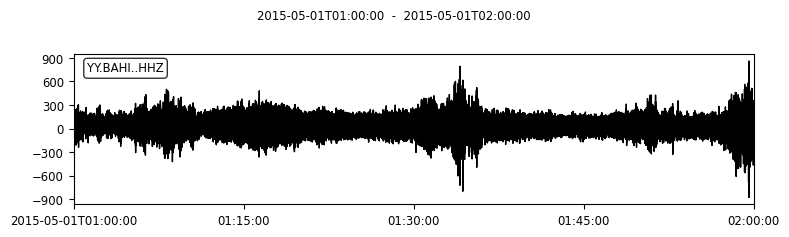

Plot for station BAHI saved as BAHI_seismic_data_plot.png.


<Figure size 640x480 with 0 Axes>

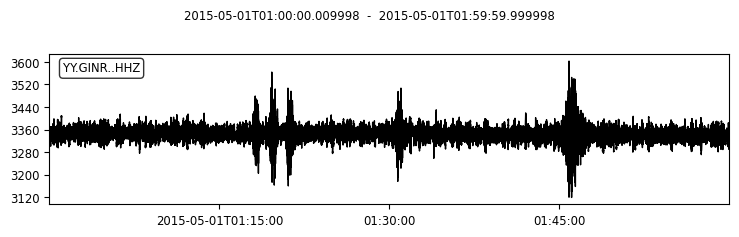

Plot for station GINR saved as GINR_seismic_data_plot.png.


<Figure size 640x480 with 0 Axes>

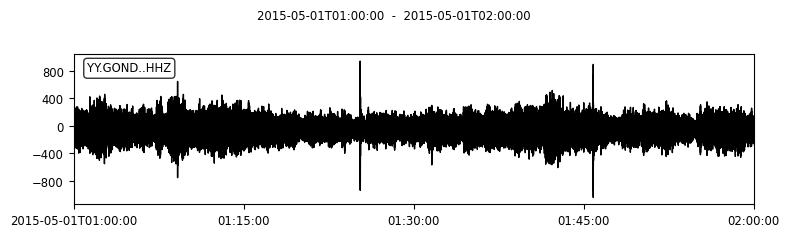

Plot for station GOND saved as GOND_seismic_data_plot.png.


<Figure size 640x480 with 0 Axes>

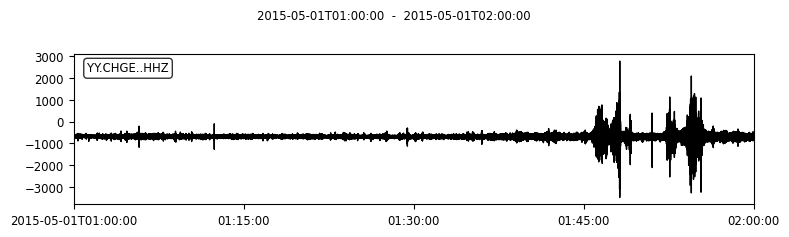

Plot for station CHGE saved as CHGE_seismic_data_plot.png.
Location of the output directory: /content/output_data


<Figure size 640x480 with 0 Axes>

In [5]:
import os
import matplotlib.pyplot as plt
from obspy import UTCDateTime
from obspy.clients.fdsn import Client

# Define the IRIS FDSN web service client
iris_client = Client("IRIS")

# Define parameters for the data request
start_time = UTCDateTime("2015-05-01T01:00:00")
end_time = UTCDateTime("2015-05-01T02:00:00")
network = "YY"  # Specify the network code
stations = ["BAHI","GINR", "GOND", "CHGE"] # Specify the station code
location = ""  # Specify the location code (empty string for default)
channel = "HHZ"  # Specify the channel code
output_dir = "output_data"  # Directory to save the output data and plots

# Create the output directory if it doesn't exist
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Request and save seismic data from IRIS for each station
for station in stations:
    try:
        st = iris_client.get_waveforms(network, station, location, channel, start_time, end_time)
        miniseed_file = f"{station}_seismic_data.mseed"
        st.write(os.path.join(output_dir, miniseed_file), format="MSEED")
        print(f"Seismic data for station {station} downloaded and saved as {miniseed_file}.")
    except Exception as e:
        print(f"Error downloading or saving seismic data for station {station}: {e}")

# Plot seismic data for each station
for station in stations:
    try:
        miniseed_file = f"{station}_seismic_data.mseed"
        st = read(os.path.join(output_dir, miniseed_file))
        st.plot(title=f"Seismic Data - {station}")
        plot_file = f"{station}_seismic_data_plot.png"
        plt.savefig(os.path.join(output_dir, plot_file))
        print(f"Plot for station {station} saved as {plot_file}.")
    except Exception as e:
        print(f"Error plotting seismic data for station {station}: {e}")

# Show the location of the output directory
print("Location of the output directory:", os.path.abspath(output_dir))
